## SIT789 Task-2.3D

In [35]:
import numpy as np
import cv2 as cv
import math
from matplotlib import pyplot as plt

In [114]:
doc = cv.imread('doc.jpg', 0) #Note that the second parameter of imread is set to 0
threshold = 200
ret, doc_bin = cv.threshold(doc, threshold, 255, cv.THRESH_BINARY)
cv.imwrite('doc_bin.png', doc_bin)

True

In [115]:
doc_bin = 255 - doc_bin #convert black/white to white/black

In [116]:
# connected component labelling
num_labels, labels_im = cv.connectedComponents(doc_bin)

In [117]:
def ExtractConnectedComponents(num_labels, labels_im):
    connected_components = [[] for i in range(0, num_labels)]
    height, width = labels_im.shape
    for i in range(0, height):
        for j in range(0, width):
            if labels_im[i, j] >= 0:
                connected_components[labels_im[i, j]].append((j, i))
    return connected_components

In [118]:
connected_components = ExtractConnectedComponents(num_labels, labels_im)

In [123]:
def get_mean_based_candidate(connected_components):
    candidate_points = []
    for x in connected_components:
        res = [round(sum(ele) / len(x)) for ele in zip(*x)]
        candidate_points.append(res)
    return candidate_points

In [124]:
mean_based_candidate_points = get_mean_based_candidate(connected_components)
mean_based_candidate_points

[[635, 873],
 [81, 8],
 [1020, 0],
 [1214, 2],
 [1078, 2],
 [663, 8],
 [1157, 10],
 [0, 20],
 [0, 22],
 [40, 23],
 [177, 132],
 [13, 154],
 [248, 190],
 [942, 209],
 [896, 235],
 [923, 242],
 [892, 245],
 [908, 244],
 [864, 253],
 [877, 249],
 [850, 253],
 [792, 256],
 [835, 256],
 [814, 257],
 [765, 264],
 [733, 267],
 [746, 267],
 [671, 274],
 [684, 274],
 [703, 273],
 [722, 270],
 [304, 275],
 [595, 285],
 [638, 282],
 [651, 280],
 [626, 284],
 [611, 288],
 [572, 290],
 [551, 284],
 [561, 292],
 [543, 295],
 [486, 292],
 [514, 300],
 [458, 304],
 [479, 303],
 [499, 302],
 [488, 303],
 [469, 306],
 [391, 314],
 [447, 311],
 [428, 312],
 [410, 314],
 [357, 325],
 [369, 320],
 [307, 326],
 [343, 324],
 [324, 326],
 [258, 325],
 [813, 326],
 [285, 331],
 [236, 328],
 [776, 336],
 [787, 327],
 [220, 338],
 [233, 339],
 [253, 336],
 [269, 334],
 [801, 335],
 [749, 339],
 [789, 336],
 [189, 343],
 [209, 343],
 [707, 346],
 [719, 336],
 [729, 345],
 [720, 346],
 [651, 346],
 [761, 345],
 [8

In [125]:
doc_bin.shape

(1752, 1272)

In [126]:
new = doc_bin.copy()

In [127]:
tr_candidate_points_x = []
tr_candidate_points_y = []

for k in mean_based_candidate_points:
    tr_candidate_points_x.append(k[0])
    tr_candidate_points_y.append(k[1])
    


In [139]:
x_index = 0

for pixel in new:    
    y_index = 0
    for v in pixel:
        
        if(x_index in tr_candidate_points_x and y_index in tr_candidate_points_y):
            new[x_index][y_index] = 0
            
        y_index += 1
    
    x_index += 1    

In [129]:
new

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [130]:
import math
distance_resolution = 1
angular_resolution = math.pi/180
density_threshold = 10

In [131]:
lines = cv.HoughLines(new, distance_resolution, angular_resolution, density_threshold)

In [132]:
detected_angle = []
for line in lines:
    distance, angle = line[0]
    detected_angle.append(angle)

In [133]:
import statistics
median_angle = statistics.median(detected_angle)
median_angle

1.3439035

True

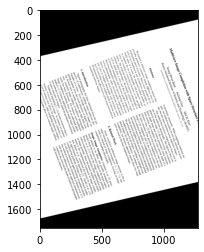

In [138]:
# rotate image
height, width = doc.shape
c_x = (width - 1) / 2.0 # column index varies in [0, width-1]
c_y = (height - 1) / 2.0 # row index varies in [0, height-1]
c = (c_x, c_y) # A point is defined by x and y coordinate
M = cv.getRotationMatrix2D(c, -median_angle * 180 / math.pi, 1)
doc_deskewed = cv.warpAffine(doc, M, (width, height))
plt.imshow(doc_deskewed, 'gray')
cv.imwrite('doc_deskewed_1.png', doc_deskewed)